# HW4: Многоклассовая классификация. PCA.

## Ф.И.О: _________

По вопросам в задании писать в беседу курса или в лс (tg: @Skorik_S)

### Описание.

Домашнее задание состоит из 2-х частей:

* теоретическая часть
* практическая часть

На проверку требуется отправить zip архив, который будет содержать следующие файлы:

* заполненный блокнот (теоретическая часть + эксперименты) в формате .ipybn
* заполненный блокнот в формате .html (File -> Save and Export Notebook As -> HTML -> ...)

Убедитесь, что все ячейки запускаются без ошибок (`Runtime` --> `Run all`)

## Теоретическая часть

### Метрики классификации

#### Задание 1 (1.5 балла):

Рассмотрим следующую выборку

In [ ]:
import pandas as pd

# Step 1: Create the DataFrame
data = {
    "Instance": range(1, 16),
    "Probability_Output": [0.95, 0.85, 0.75, 0.65, 0.60, 0.55, 0.50, 0.45, 0.40,
                           0.35, 0.30, 0.25, 0.20, 0.15, 0.10],
    "Target": [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
}

df = pd.DataFrame(data)

df

,Instance,Probability_Output,Target
0,1,0.95,1
1,2,0.85,1
2,3,0.75,1
3,4,0.65,1
4,5,0.60,0
5,6,0.55,0
6,7,0.50,1
7,8,0.45,0
8,9,0.40,0
9,10,0.35,1


Выборка содержит номер сэмпла `Instance`, ответ модели $a(x)$ (в терминах вероятности принадлежности положительному классу `Probability_Output`) и реальную метку `Target`. \\

Качество модели $a(x)$ определяется выбираемым порогом $t \in [0, 1]$. Получая конкретные значения ответов $o(x, t) = \mathbb{I}[a(x) \geqslant t]$, где $\mathbb{I}[\cdot]$ -- индикаторная функция, мы можем посчитать точность, f1-score и другие метрики классификации.  



1. Постройте ROC и PR кривые. Посчитайте площади под графиками.
2.   Какой из графиков лучше описывает предсказания модели? Ответ обоснуйте.
3.   Пусть теперь ответы модели $a(x, t)$ определяются выражением: $a(x, t) := \mathbb{I}[a(x) \geqslant t]$, где $\mathbb{I}[\cdot]$ -- индикаторная функция. Дайте аналитические выражения площади под ROC- и PR-кривой, используя долю правильных ответов и полноту $a(x, t)$, а также количество отрицательных и положительных примеров $\ell_-$, $\ell_+$.
4.   Каким, на ваш взгляд, должен быть оптимальный порог в случае, если положительная метка означает:
    * наличие болезни у человека;
    * Решение о выделении большого кредита;

**Важно!:** Задание проверяет базовое умение строить ROC и PR графики, поэтому использование готовых решений типа `sklearn.metrics.roc_curve` запрещено. Все вспомогательные шаги для отрисовки графиков должны быть имплементированы самостоятельно (либо построение графика может быть выполнено аналитически). Пункты 2-4 должны быть выполнены аналитически. Все ответы должны быть обоснованы.

---

**Ваше решение:**

---

#### Задание 2 (1.5 балла):

1. Покажите, что:
$$
0 \leqslant \text{F1-score} \leqslant 1
$$ \\
2. Покажите что площать под ROC-кривой случайного классификатора равна 0.5.
    * Рассмотрите классификатор $a(x) \sim Bernoulli(p)$, $p \sim  U[0,1]$.
    * Определите пропорцию положительных классов в датасете как $q \sim  U(0, 1)$. Всего примеров $d$.
    * Тогда $ROC-AUC$ является случайной величиной от i.i.d. значений $p, q$.
    * Ответом является $\mathbb{E}_{p,q}[ROC-AUC]$
3. Покажите, что в случае многоклассовой классификации $Precision_{micro} = Recall_{micro} = Accuracy$  

---

**Ваше решение:**

---

#### (Доп.) Задание 3 (1 балл)

Построим [U-статистику](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) выборки $X$:

1. Для $X$ получим выходы модели: $O = \{o_i = a(x_i), x_i \in X\}_{i=1}^{\ell}$
2. Упорядочим ответы $o_i$ по неубыванию: $O_+ → (o_{(1)}, \ldots o_{(\ell)})$. В соответствии ответам, получим упорядоченный ряд $(x_{(1)}, \ldots x_{(\ell)}).$
3. Каждому $x_{(i)}$ ставится в соответствии ранг $r_{(i)}$ -- номер позиции в ряду (если $o_{(i)}$ совпала с соседями -- ранг усредняется по ним).
4. Тогда U-статистика для подвыборки $X$ с положительными метками: $X_+ = \{x_i, x_i \in X, y_i = 1\}_{i=1}^{\ell_+}$:
$$
U_+ = \sum_{i=1 \\ y_i=1}^\ell r_{(i)} - \dfrac{\ell_+(\ell_+ + 1)}{2}
$$

Покажите, что для классификатора $a(x)$ на выборке $X$ верно следующее соотношение
$$
\text{ROC-AUC} = \dfrac{U_+}{\ell_-\ell+}
$$

---

**Ваше решение:**

---

### PCA

### Задание 4 (2.5 балла)

#### Задание 4.1 (1 балл)

[PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) определяется как преобразование данных, в котором проекции упорядочены по убыванию дисперсии
$$
T = \underbrace{X}_{n\times p}\underbrace{W}_{p\times l}, \quad T = \|t_{(i)}\|_{i=1}^n,\,\,\, t_{(i)} = (t^1_{(i)} \ldots, t^l_{(i)})^\top \in \mathbb{R}^l, \quad x \in \mathbb{R}^p \tag{1}
$$
Последнее означает, что первая компонента преобразования $w_{(1)}$ удовлетворяет оптимизационной задаче (максимизация дисперсии строки $T$):
$$
w_{(1)} = \arg\max_{w} \left\{\sum_{i}\left[t^1_{(i)}\right]^2\right\} = \arg\max_{w} \left\{\|Xw\|^2\right\} \tag{2}
$$
Чтобы задача (2) имела конечное решение, оптимизацию проводят на симплексе:
$$
w_{(1)} = \arg\max_{\|w\| = 1} \left\{\|Xw\|^2\right\}. \tag{3}
$$

\\
Покажите, что решением задачи (3) является вектор $u_{(1)}$, соответствующий максимальному собственному значению $\lambda_{(1)}$ матрицы $X^\top X$.

\\
**Указание:** Воспользуйтесь условиями [ККТ](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) для решения задачи условной оптимизации.

---

**Ваше решение:**

---

#### Задание 4.2 (0.5 балла)

Вторая компонента $t_{(2)} = w_{(2)}^\top X$ должна иметь следующую по величине дисперсию.

Однако в таком предположении мы всегда можем выбрать $t_{(2)} = (1 - \varepsilon_{(1)})t_{(1)}$ для сколь угодно малого $\varepsilon_{(1)} > 0$. Аналогично $t_{(3)} = (1 - \varepsilon_{(2)})t_{(2)}$ и так далее. Таким образом, разложение $X$ теряет смысл, поскольку вектора $t_{(1)}, \ldots, t_{(n)}$ являются коллинеарными.

Чтобы получить осмысленное разложение, потребуем чтобы $t_{(2)}$ *некореллировал* с $t_{(1)}$.

Покажите, что для этого необходимо, чтобы $w_{(2)}^\top u_{(1)} = 0$.

---

**Ваше решение:**

---

#### Задание 4.3 (0.5 балла)

Задача оптимизации для $w_{(2)}$ с учётом 4.2
$$
w_{(2)} = \arg\max_{\|w\| = 1, \\ w \in H_1} \left\{\|Xw\|^2\right\}, \quad H_1 = \{w : w^\top u_{(1)} = 0\}
$$
В общем случае для $w_{(j)}$
$$
w_{(j)} = \arg\max_{\|w\| = 1, \\ w \in H_{j-1}} \left\{\|Xw\|^2\right\}, \quad H_{j-1} = \left\{w : w^\top u_{(k)} = 0, \,\, k=\overline{1, j-1}\right\} \tag{4}
$$

\\
Покажите, что решением задачи (4) является вектор $u_{(j)}$, соответствующий $j$-му собственному значению $\lambda_{(j)}$ матрицы $X^\top X$.

\\
**Указание:** Воспользуйтесь условиями [ККТ](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) для решения задачи условной оптимизации.

---

**Ваше решение:**

---

#### Задание 4.4 (0.5 балла)

Из предыдущих 3-х пунктов мы выяснили, что процедура построения главных компонент сводится к поиску собственных векторов матрицы $X^\top X$.

На практике бывает полезно центрировать матрицу $X \rightarrow \bar{X}$.Действительно, с точки зрения разложения, выражения $X^\top X$ и $\bar{X}^\top \bar{X}$ связаны соотношением:
$$
X^\top X = \bar{X}^\top \bar{X} + n\mu\mu^\top,
$$
где $\mu = 1/n\sum_i x_i$ -- выборочное среднее $X$. Тогда, если данные сильно смещены, с.в. и с.з. $X^\top X$ определяются слагаемым смещения и не содержат реальной инфомрации о главных компонентах разложения.

---

В центрированном случае $X = \bar{X}$ и $\bar{X}^\top \bar{X}$ имеет смысл *матрицы ковариации* $cov(X, X) = \frac{1}{n-1}\bar{X}^\top \bar{X}$.

---

Рассмотрим kernelPCA, использующий ядерный трюк:
$$
\mathcal{K}: \mathcal{X}\times\mathcal{X} \rightarrow \mathbb{R}, \quad \mathcal{K}(x_i, x_j) = \langle \psi(x_i), \psi(x_j) \rangle,\,\,\, \psi(x) \in \mathbb{R}^P, P > p.
$$

Тогда соответствующая матрица ковариации представлена *матрицей грамма* $cov(X, X) → K(X, X) = \|\mathcal{K}(x_i, x_j)\|_{i, j}^n$.


Аналогично PCA, давайте центрируем матрицу грамма. Определим $\bar{\psi}(x_i) = \psi(x_i) - \mu$, где $\mu = \frac{1}{n}\sum_{i=1}^n \psi(x_i)$ и $\bar{K}(X, X) = \|\mathcal{K}(x_i, x_j)\|_{i, j}^n$.

**Покажите, что**
$$
\bar{K} = K - \mathbf{1_N}K - K\mathbf{1_N} + \mathbf{1_N}K\mathbf{1_N}, \quad K = \|\mathcal{K}(x_i, x_j)\|_{i, j}^N,\,\,\, \mathbf{1_N} \equiv \|1/N\|_{i, j}^N.
$$

Эта формула нам пригодится при ручной имплементации Kernel-PCA

---

**Ваше решение:**

---

### Задание 5 (1 балл)

Покажите, что описанная процедура PCA инвариантна относительно поворота:

1. Согласно заданию 4.1-4.3 определим PCA как
$$
T = \underbrace{X}_{n\times p}\underbrace{W}_{p\times l}, \quad T = \|t_{(i)}\|_{i=1}^n,\,\,\, t_{(i)} = (t^1_{(i)} \ldots, t^l_{(i)})^\top \in \mathbb{R}^l, \quad x \in \mathbb{R}^p.
$$
2. Определим матрицу поворота $Q$ и "повёрнутые" данные $\tilde{X}$:
$$
\tilde{X} = XQ.
$$
3. Определим PCA-преобразование над $\tilde{X}$
$$
\widetilde{T} = \tilde{X}\tilde{W}.
$$
4. Тогда инвариантность означает $T = \widetilde{T}$


**Подсказка:** Воспользуйтесь тем, что $W$ и $\tilde{W}$ определяются собственными векторами соответствующих матриц ковариации $X^\top X$ и $\tilde{X}^\top\tilde{X}$, а также что матрица поворота $Q$ обладает свойством ортогональности.

---

**Ваше решение:**

---

### (Доп.) Задание 6 (1 балл)

Процедура построения главных компонент требует их *некореллированности:* $cov(t_{(i)}, t_{(j)}) = 0$, $\forall\, i, j$.

Вместе с этим, некореллированность **не гаранирует** статитстическую независимость.

1. Приведите пример PCA разложения, в котором $t_{(i)}, t_{(j)}$ являются зависимыми случайными величинами

2. Покажите что в случае $\underbrace{X}_{n\times p} \sim \mathcal{N}(\mu, \Sigma)$ при $n \to \infty$ главные компоненты будут независимыми случайными величинами. Почему важно условие $n \to \infty$? Ответ обоснуйте или приведите пример

---

**Ваше решение:**

---

### (Доп.) Задание 7 (1 балл)

**Связь вероятностного и классического PCA**

1. Определим *вероятностный PCA* как *модель скрытой переменной*:
$$
x = zW^\top + \varepsilon \tag{5}
$$
2. Полученные с помощью решения (4) главные компоненты $t_{(1)}, \ldots, t_{(p)}$ можно использовать для уменьшения размерности X:
$$
T_l = XW_l, \quad T_l = \|t_{(i)}\|_{i=1}^l
$$
В силу процедуры построения $W_l$ ортонормированна: $W_lW_l^\top = I_l$, тогда
$$
T_lW_l^\top = X I_l \overset{\mathrm{def}}{=} X_l \tag{6}
$$
В результате чего $X_l$ является сжатым представлением $X$.
3. Качество компрессии можно оценивать с помощью $X - X_l = \varepsilon$:
$$
X = X_l + \varepsilon = T_lW_l^\top + \varepsilon
$$
4. Проводя оценку для конкретного примера $x_i$ и $z_i = t_{(i)}$ мы получаем соответствие моделей (5) и (6).

Однако, для того чтобы утверждать, что модель скрытой переменной (5) является вероятностной версией PCA, необходимо показать, что процедура оптимизации такой модели совпадает с процедурой оптимизации (6).



*   Покажите связь PCA с SVD разложением:
$$
X = U\Sigma V^\top, \quad W^\top = \Sigma V^\top
$$
*  Покажите, что оптимизация (5) по $W$ даст $W^\top = \Sigma V^\top$ в априорных предположениях $\varepsilon \sim \mathcal{N}(0, \sigma I^2)$ и $p(z) = \mathcal{N}(0, I)$ при $\sigma \to 0$. Для этого воспользуйтесь максимизацией логарифма правдоподобия $\log p(x | W, \sigma)$.



---

**Ваше решение:**

---

## Практическая часть

### Imports

In [2]:
from typing import Callable
import os
import pandas as pd
import numpy as np
import gdown
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# download helper function
def download_with_shared_id(file_id, filename):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    gdown.download(url, filename, quiet=False)

### Задание 8 (PCA on sythetic data)

В папке с заданием вы найдёте файл `synthetic_data.csv`. Вы можете напрямую загрузить файл во временной окружение или воспользоваться кодом ниже

In [ ]:
synthetic_data_file_id = '1mB6bUInPMxUmvLf58SA33Jd1ZQOe1OWc'
download_with_shared_id(synthetic_data_file_id, 'synthetic_data.csv')
df = pd.read_csv('synthetic_data.csv')
df.head(5)

Downloading...
From: https://drive.google.com/uc?export=download&id=1mB6bUInPMxUmvLf58SA33Jd1ZQOe1OWc
To: /content/synthetic_data.csv
100%|██████████| 253k/253k [00:00<00:00, 28.8MB/s]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,label
0,0.373742,2.082607,1.384016,0.232210,1.867932,0.799906,1.569763,1.743720,2.718933,3.638285,0.581565,1.133964,-0.613302,0
1,-1.651953,2.433542,0.968096,0.000237,1.823808,0.298767,0.968167,0.975870,2.448763,1.862862,0.113761,1.138231,-1.089608,0
2,-0.940813,3.277671,1.587022,0.000137,1.999868,0.421152,1.587080,1.371682,3.291364,3.861090,-0.097646,1.689374,-0.887808,0
3,-0.532969,2.683229,2.297609,0.005673,1.747180,0.594575,2.300983,1.788795,2.783969,3.345638,0.186806,1.312156,-0.544618,0
4,-1.067956,2.409374,0.915896,0.002368,1.793093,0.441066,0.916941,1.091797,2.460215,1.920850,0.151944,1.277589,-0.769468,0


#### Задача 1 (Анализ данных) (0.5 балла)

1. Проведите базовый исследовательский анализ предложенных данных.
    *   Исследуйте распределение меток
    *   Визуализируйте зависимости между компонентами примеров

    (Анализ данных не обязан ограничиваться данными пунктами.)

2. Выберите метрики для дальнейшего тестирования

3. Для того, чтобы тестирование вашей имплементации PCA было корректным, **важно** не изменять структуру и содержимое `df`.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

В случае данных, природа которых нам не ясна, имеет смысл проводить *стандартизацию.* Стандартизация проводится на основе статистик датасета (среднее, дисперсия). Хорошим тоном является подсчёт таких статистик только для тренировочной части выборки. В этом случае мы исключаем неявное "подсматривание" в тестовый набор, получая более объективные результаты предсказаний.

Делать мы так, конечно же, не будем 😃🤗😃 (чтобы не усложнять себе жизнь при понижении размерности с помощью PCA)

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop(columns='label')
y = df['label']

Проведите стандартизацию (для этого воспользуйтесь модулем `sklearn.preprocessing.StandardScaler`)

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# Output: X

#### Задача 2 (Имплементация PCA) (1 балл)

Самостоятельно имплементируйте метод главных компонент согласно утверждению из Задания 4.3.

1.   Постройте матрицу $X^\top X$. Вы можете воспользоваться тем что
$$
cov(X, X) = \dfrac{1}{n-1}\overline{X}^\top\overline{X}, \quad \overline{X} = X - mean(X).
$$
2. Найдите собственные значения и собственные векторы матрицы $X^\top X$
3. Отсортируйте с.з. и с.в. в убывающем порядке.

**Примечание:** Для выполнения пунктов 1-2 вы можете пользоваться соответствующим функционалом библиотеки `numpy`.

In [ ]:
def get_pca_components(cov_matrix):
    # make points 2. and 3.
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    return eigenvalues, eigenvectors

# 1. compute covariance matrix to `cov_matrix`
eigenvalues, eigenvectors = get_pca_components(cov_matrix)

In [ ]:
def assert_eigenvalues(eigenvalues: np.ndarray) -> None:
    true_eigenvalues = np.array([3.71065006e+00, 2.83985667e+00, 2.00690398e+00, 1.06056661e+00,
                                 1.04028115e+00, 8.96689475e-01, 6.42816087e-01, 4.42744367e-01,
                                 2.94271935e-01, 5.91739353e-02, 1.65303064e-02, 1.55655953e-03,
                                 9.97985951e-04]
                              )
    assert np.allclose(true_eigenvalues, eigenvalues, atol=1e-6), "Eigenvalues are not equivalent"
    print("Success!!!")

assert_eigenvalues(eigenvalues)

Построим график суммарной объясняемой дисперсии (Cumulative Explained Variance) от количества главных компонент.

In [ ]:
# Calculate explained variance for each component
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

Одной из особенностей предложенного набора данных является дисбаланс классов (мы надеемся, что вы это выяснили в ходе анализа данных). Таким образом, корректное разделение выборки на обучение и тест должно быть [стратифицированным](https://scikit-learn.org/stable/modules/cross_validation.html#stratification).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Задача 3 Классификация (2 балла)

Проведите обучение и тестирование логистической регрессии. Данные должны проецироваться на полученные главные компоненты (см. (1) в задании 4.1). Постройте графики зависимости выбранных метрик от количества главных компонент. Сделайте выводы.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

#### Задача 3 (Имплементация Kernel-PCA) (5 баллов)

Приступим к имплементации Kernel-PCA😋.

Цель та же -- найти с.з. и с.в. Однако вместо поиска их у матрицы ковариации $cov(X, X)$ будем искать их для матрицы грамма (см. задание 4.4).

Будем рассматривать следующие типы ядерных функций:

* Линейное $K_{L}(X,Y) =  X Y^\top$;
* Полиномиальное $K_{d, c}(X,Y) = (X Y^\top + c)^d$;
* Радиально-Базисная Функция (РБФ) $K_\gamma(X, Y) = \exp\left\{\gamma\|X-Y\|^2\right\}$;
* Сигмоидальная $\sigma_{\gamma}(X, Y) = \tanh{(\gamma\cdot X Y^\top + c)}$
* Косинусная $cos(X, Y) = X Y^\top / (\|X\|*\|Y\|)$

**Задание 3.1: (1 балл)** Необходимо имплементировать перечисленные ядерные функции

In [ ]:
def linear_kernel(X, Y=None):
    if Y is None:
        Y = X
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def poly_kernel(X, Y=None, degree=3, coef=1.):
    if Y is None:
        Y = X
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def rbf_kernel(X, Y=None, gamma=None):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def sigmoid_kernel(X, Y=None, gamma=None, coef=1.):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

def cosine_kernel(X, Y=None, gamma=None, coef=1.):
    if Y is None:
        Y = X
    if gamma is None:
        gamma = 1.0 / X.shape[1]
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    assert kernel.shape == (X.shape[0], X.shape[0])
    return kernel

Полученную матрицу необходимо центрировать. Воспользуемся результатом задания 4.4:
$$
\bar{K} = K - \mathbf{1_N}K - K\mathbf{1_N} + \mathbf{1_N}K\mathbf{1_N}, \quad K = \|\mathcal{K}(x_i, x_j)\|_{i, j}^N,\,\,\, \mathbf{1_N} \equiv \|1/N\|_{i, j}^N.
$$

**Задание 2: (0.5 балла)** Имплементируйте центрирование матрицы грамма

In [ ]:
def center_kernel(K):
    # YOUR CODE HERE:
    ###########################
    ### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    ###########################
    pass

Соберём все в класс `KernelPCA`

In [ ]:
class KernelPCA:
    def __init__(self, n_components: int, kernel: Callable, **kernel_params) -> None:
        self.n_components = n_components
        assert isinstance(kernel, Callable), f"kernel should be Callable, you provide {type(kernel)}"
        self.kernel = kernel
        self.kernel_params = kernel_params
        self.eigenvalues = None
        self.eigenvectors = None

    def fit_transform(self, X):
        K = self.kernel(X, **self.kernel_params)
        K_centered = center_kernel(K)
        self.eigenvalues, self.eigenvectors = get_pca_components(K_centered)
        self.eigenvalues = np.clip(self.eigenvalues, a_min=0, a_max=None)
        # Normalize eigenvectors (each column divided by sqrt(eigenvalue))
        self.eigenvectors = self.eigenvectors / np.sqrt(self.eigenvalues + 1e-10)
        self.eigenvalues = self.eigenvalues[:self.n_components]
        return np.dot(K_centered, self.eigenvectors[:, :self.n_components])

Проверка имплементации

In [ ]:
def assert_kpca():
    n_components = 13

    linear_answers = np.array([
        1.00000000e+00, 7.65325918e-01, 5.40849701e-01, 2.85816930e-01,
        2.80350109e-01, 2.41652934e-01, 1.73235437e-01, 1.19317198e-01,
        7.93046851e-02, 1.59470536e-02, 4.45482761e-03, 4.19484323e-04,
        2.68951783e-04
    ])

    poly_answers = np.array([
        1.00000000e+00, 8.38128700e-01, 5.16131520e-01, 3.77038000e-01,
        3.08713630e-01, 2.78047060e-01, 2.57149900e-01, 2.43782890e-01,
        2.24221330e-01, 2.07156400e-01, 1.82629920e-01, 1.66992480e-01,
        1.57221440e-01
    ])

    rbf_answers = np.array([
        1.00000000e+00, 7.15032620e-01, 6.79436430e-01, 3.15607890e-01,
        3.05523880e-01, 2.87117720e-01, 2.84299700e-01, 2.72074470e-01,
        2.42323240e-01, 1.87167890e-01, 1.48309100e-01, 1.37459850e-01,
        1.28174180e-01
    ])

    sigmoid_answers = np.array([
        1.00000000e+00, 7.61327120e-01, 4.70978290e-01, 3.01313000e-01,
        2.95793220e-01, 2.54351330e-01, 1.15666760e-01, 9.23709900e-02,
        4.52054200e-02, 1.68690600e-02, 1.42803400e-02, 1.14450900e-02,
        1.03591100e-02
    ])

    cosine_answers = np.array([
        1.00000000e+00, 7.13192056e-01, 5.48668783e-01, 2.99406183e-01,
        2.88770492e-01, 2.72318496e-01, 1.81658909e-01, 1.31574265e-01,
        7.24384288e-02, 1.31406641e-02, 4.31671372e-03, 4.67396214e-04,
        2.88007519e-04
    ])

    true_eigenvalues = {
        'linear': linear_answers,
        'poly': poly_answers,
        'rbf': rbf_answers,
        'sigmoid': sigmoid_answers,
        'cosine': cosine_answers
    }

    kernels = [linear_kernel, poly_kernel, rbf_kernel, sigmoid_kernel, cosine_kernel]

    for kernel in kernels:
        kpca = KernelPCA(n_components=n_components, kernel=kernel)
        _ = kpca.fit_transform(X)
        target_eigenvalues = kpca.eigenvalues / kpca.eigenvalues[0]
        kernel_name = kernel.__name__.replace('_kernel', '')

        assert np.allclose(
            true_eigenvalues[kernel_name],
            target_eigenvalues,
            atol=1e-6
        ), f"{kernel.__name__} eigenvalues are not equivalent"

    print("Success!")

assert_kpca()

**Задание 3 (2 балла):** Проведите обучение и тестирование логистической регрессии. Данные должны проецироваться на главные компоненты `KernelPCA` для различных типов ядерных функций.

*Обратите внимание!* $\,\,$ главные компоненты получаются для всей матрицы $X$. Таким образом вначале необходимо осуществить проецирование, а затем деление набора на `train` и `test`

*Обратите внимание [2]!* $\,\,$ в `KernelPCA` передаётся `Callable` объект `kernel`. Таким образом, инициализация не ограничивается имплементированными ядерными функциями, но и может содержать композитные ядра, как это проводилось на семинаре 7.

Вам необходимо сравнить качество имплементированных ядерных функций от количества главных компонент. Добавьте по-крайней мере одну композитную ядерную функцию. Сравните результаты с линейным ядром. Сделайте выводы.

**Важно!** используйте комманду `%%time` для подсчета выполнения полной процедуры обучения. Это потребуется для сравнения с имплементацией `sklearn` в задании 4

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

**Задание 4 (1.5 балла):** проведите аналогичное обучение для библиотечной имплементации `from sklearn.decomposition import KernelPCA as SKKernelPCA`. Пользуйтесь аналогичной логикой `fit_transform` на всём обучающем наборе, а затем стратифицированно делите.

Сравните время и качество классификации. Есть ли различие? Сделайте выводы.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

### Задание 9 (PCA Image Compression) (3 балла)

Метод главных компонент используют для понижения размерности данных. Давайте воспользуемся этим для компрессии изображения. Чтобы понять интуицию сжатия, обратимся к матричному разложению PCA

$$
\underbrace{X}_{w\times h} \approx \underbrace{T_l}_{w\times l} \cdot \underbrace{W_l^\top}_{l\times h},
$$
где $l < h$ (малоранговое приближение).

В папке с заданием вы найдёте 3-х канальное изображение `sean-yalda.jpg`. Вам необходимо получить сжатое информативное представление этого изображения.

Воспользуемся автоматическим скачиванием через shared-ссылку (вы можете напрямую добавить картинку в окружение ноутбука)

Downloading...
From: https://drive.google.com/uc?export=download&id=1geYxsmnvVJKQkyl-WB0izTqi-fLz8UET
To: /content/sean-yalda.jpg
100%|██████████| 2.11M/2.11M [00:00<00:00, 124MB/s]


(3375, 6000, 3)


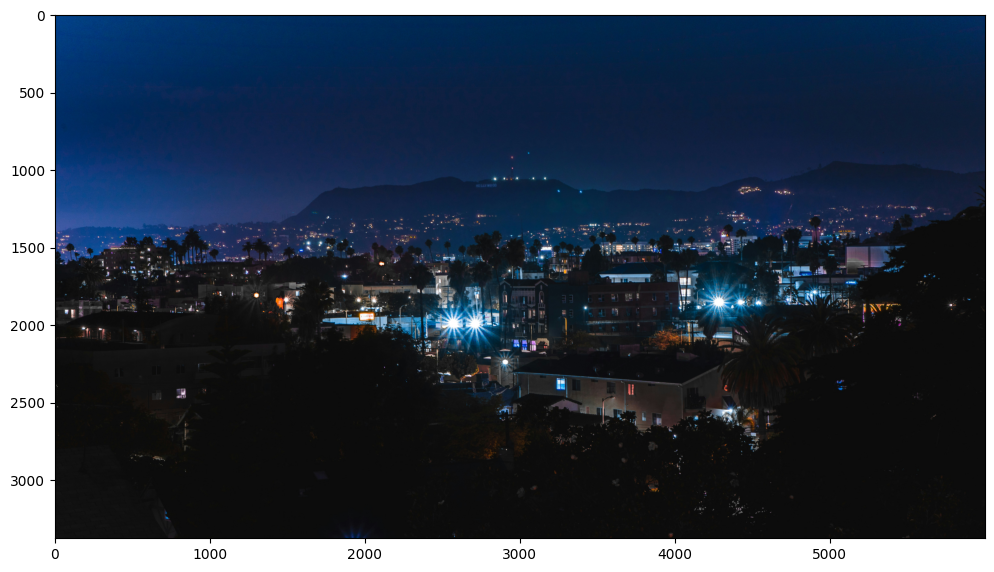

In [ ]:
image_file_id = "1geYxsmnvVJKQkyl-WB0izTqi-fLz8UET"
download_with_shared_id(image_file_id, 'sean-yalda.jpg')

# Load image
image = Image.open("sean-yalda.jpg")
image_array = np.array(image).astype(np.uint8)
print(image_array.shape)

plt.figure(figsize=[12,8])
plt.imshow(image)

Обратите внимание, что мы работаем с форматом `uint8`

Сделаем пробное сжатие с помощью PCA.

Метод главных компонент работает с двумерными матрицами, поэтому 3-х канальное изображение необходимо преобразовать. Для примера, давайте просуммируем изображение вдоль всех каналов

transformed data shape: (3375, 100)


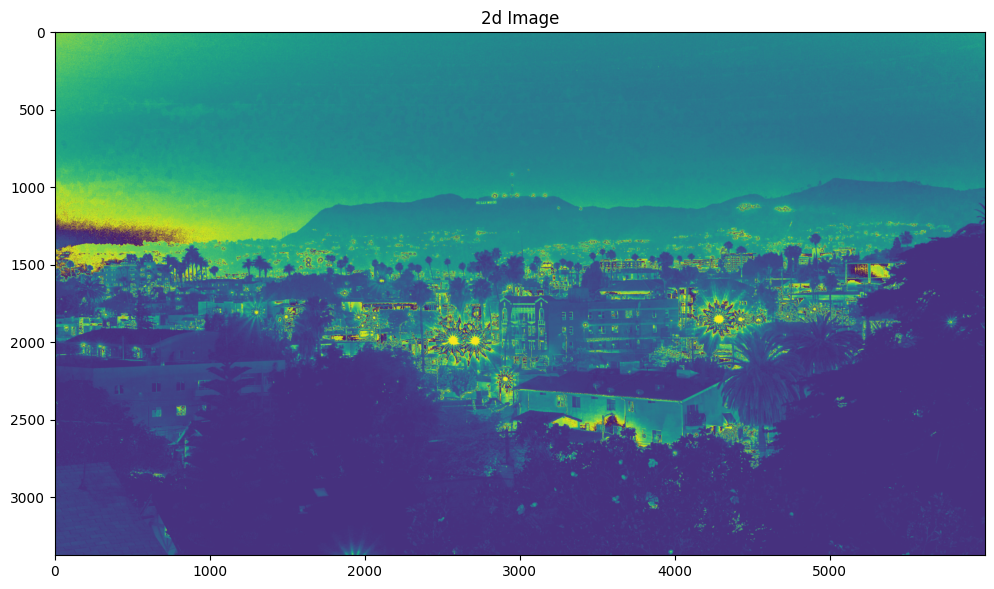

In [ ]:
from sklearn.decomposition import PCA

image_2d = image_array.sum(axis=2).astype(np.uint8)
plt.figure(figsize=[12,8])
plt.imshow(Image.fromarray(image_2d))
plt.title("2d Image")

pca = PCA(n_components=100)
transformed_data = pca.fit_transform(image_2d)
print(f"transformed data shape: {transformed_data.shape}")

Мы получили сжатое представление $T_l$. Для реконструкции $X$, необходимо обратно перевести $T_l \rightarrow \tilde{X}$

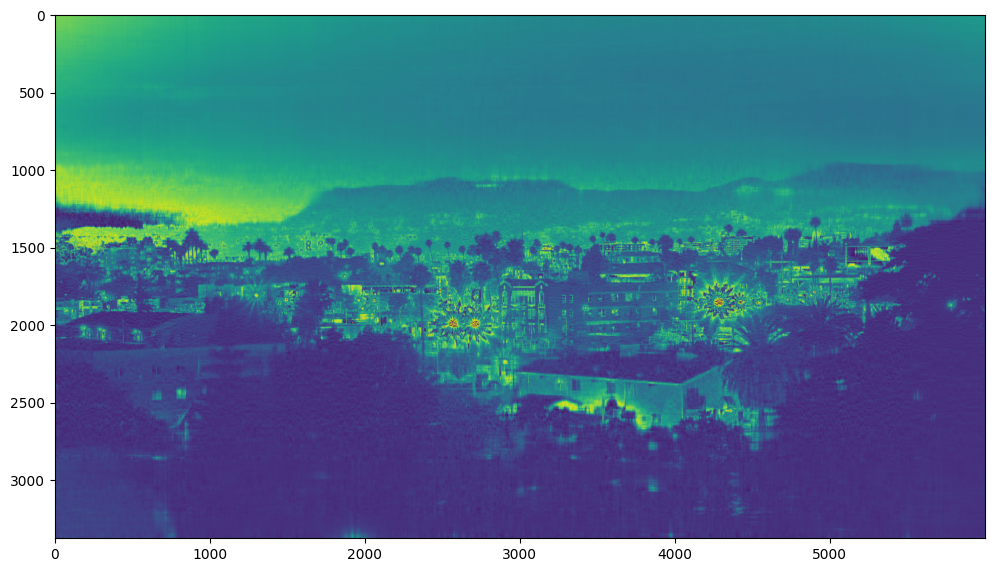

In [ ]:
reconstructed_image = np.dot(transformed_data, pca.components_) + pca.mean_
reconstructed_image = reconstructed_image.astype(np.uint8)
plt.figure(figsize=[12,8])
plt.imshow(Image.fromarray(reconstructed_image))

Степень сжатия будем определять как отношение размера оригинальной картинки к размеру всех ингридиентов для реконструкции:

In [ ]:
# Comparative analysis
original_size = image_array.nbytes / 1e+6
compressed_size = transformed_data.nbytes / 1e+6 + pca.components_.nbytes / 1e+6 + pca.mean_.nbytes / 1e+6

print(f"Original size: {original_size} Megabytes,\nPCA Compressed size: {compressed_size} Megabytes,\nRelative compression: {round(original_size / compressed_size, 3)} times")

Original size: 60.75 Megabytes,
PCA Compressed size: 7.548 Megabytes,
Relative compression: 8.048 times


Качество компрессии будем определять с помощью [`structural_similarity`](https://scikit-image.org/docs/0.24.x/auto_examples/transform/plot_ssim.html):
$$
\text{SSIM}(x, y) = \dfrac{(2\mu_x\mu_y + c_1)(2\Sigma_{xy} + c_2)}{(\mu_x^2 + \mu_y^2 + c_1)(\sigma_x^2 + \sigma_y^2 + c_2)} \in [-1, 1],
$$

где $\mu_x, \sigma_x, \mu_y, \sigma_y$ -- средние и дисперсии изображений $x$ и $y$, $\Sigma_{xy}$ -- ковариация. Константы $c_1$ и $c_2$ нужны для численной устойчивости.

Индекс $\text{SSIM}$ интерпретируется как структурная близость изображений. $\text{SSIM} = 1$ означает идеальную близость (изображения одинаковые). $\text{SSIM} = 0$ для случайных изображений, $\text{SSIM} = -1$ в случае идеальной анти-корреляции.

Обратите внимание, несмотря на преобразование исходного изображения к двумерному виду, финальное качество меряется в сравнении с оригиналом.

В связи с этим, реконструированное изображение необходимо привести к 3-х мерному виду. Для этого давайте просто скопируем его вдоль новой оси.

In [ ]:
from skimage.metrics import structural_similarity as ssim

image_3d = np.stack([image_2d, image_2d, image_2d], axis=-1).astype(np.uint8)
reconstructed_image_3d = np.stack([reconstructed_image, reconstructed_image, reconstructed_image], axis=-1).astype(np.uint8)

ssim_index = ssim(image_array, reconstructed_image_3d, win_size=5, channel_axis=-1)
ssim_index_2 = ssim(image_2d, reconstructed_image, win_size=5, channel_axis=-1)
ssim_index_3 = ssim(image_array, image_3d, win_size=5, channel_axis=-1)

print(f"Target SSIM: {ssim_index}")
print(f"SSIM between 2d images: {ssim_index_2}")
print(f"SSIM between Summed and Original Image: {ssim_index_3}")

Target SSIM: 0.4515799925973754
SSIM between 2d images: 0.7218769903509638
SSIM between Summed and Original Image: 0.48889587991530065


Можно заметить, что основная просадка обоснована упрощением, связанным с приведением оригинального изображения к двумерному виду посредством суммирования его по каналам. Также, количество главных компонент было выбрано произвольно.

#### Задача 1 (Channel-wise Compression) (2 балла)

Вам необходимо провести более аккуратную компрессию, сжимая изображение независимо по каждому из каналов и подбирая для каждого из них своё количество компонент.

**Вам необходимо достигнуть степени сжатия в 1.5 раза при ssim > 0.9**

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

#### Задача 2 (Kernel-PCA Image Compression) (1 балл)

Повторите эксперимент для PCA с нелинейными ядрами (rbf, poly).

1. Какого индекса structural similarity в таком случае вам удалось добиться?
2. Какая в таком случае получается степень сжатия? (Вопрос с подвохом 😀)


In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################

---

### Задание 10 (Robust PCA) (2 балла)

Обработка данных высокой размерности встречается повсеместно в современных пайплайнах машинного обучения. Однако, реальные данные зачастую содержат большое количество шума: $\tilde{X} \rightarrow X + \varepsilon$. В таком случае, полученное низкоразмерное представление $\tilde{X}_{\ell}$ может значительно отличаться от искомого $X_{\ell}$.

Чтобы сделать поправку на различные компоненты исходных данных $\tilde{X}$, декомпозицию проводят следующим образом
$$
\tilde{X} \approx \tilde{X}_{\ell} + \tilde{S},
$$
где $\tilde{X}_{\ell}$ малоранговая, а $\tilde{S}$ -- разреженная (то есть содержащая большое количество нулей). В случае с шумом, элементы $\tilde{S}$ можно интерпретировать как магнитуду шума. Такую декомпозицию будем называть *устойчивой (Robust pca)*.

\\

Вместе с этим, существует много приложений, где природа данных естесственным образом моделируется низкоранговым и разреженным вкладами.
* *Видеонаблюдение*: Статичный фон выступает низкоранговым слагаемым, в то время как движущиеся объекты -- разреженным.
* *Распознавание по лицу*: статичным объектом является лицо человека (низкоранговое приближение), в то время как различные искажения и фон моделируются разреженной матрицей.
* [Тематическое моделирование](http://www.machinelearning.ru/wiki/index.php?title=%D0%92%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D0%B5_%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2%29): тематическая модель является задачей стохастического матричного разложения.


Выпишем соответствующую задачу оптимизации:

$$
\begin{cases}
rank(\tilde{X}_{\ell}) + \alpha \cdot nnz(\tilde{S}) \rightarrow \min\limits_{\tilde{X}_{\ell}, \tilde{S}}, & \alpha > 0 \\
s.t. \tilde{X} = \tilde{X}_{\ell} + \tilde{S},
\end{cases}
$$
где $nnz(\tilde{S})$ означает количество ненулевых элементов матрицы $\tilde{S}$.  Однако такую задачу решать крайне сложно из-за отсутствия непрерывности и выпуклости. Поэтому обычно ее [заменяют на более простую](https://arxiv.org/pdf/0912.3599):
$$
\begin{cases}
\|\tilde{X}_{\ell}\|_{\ast} + \alpha \cdot \|\tilde{S}\|_{1} \rightarrow \min\limits_{\tilde{X}_{\ell}, \tilde{S}}, & \alpha > 0 \\
s.t. \tilde{X} = \tilde{X}_{\ell} + \tilde{S},
\end{cases}
$$
где $\|\tilde{X}_{\ell}\|_{\ast} := \sum_i \sigma_i(\tilde{X}_{\ell})$ -- ядерная норма матрицы, $\sigma_i(\tilde{X}_{\ell})$ -- $i$-ое сингулярное число, $\|\cdot\|_1$ является $\ell_1$ нормой.

В папке с заданием вы найдёте имплементацию robust PCA в файле `r_pca.py`. Можете напряму добавить его в текущее окружение или воспользоваться кодом ниже

**Примечание:** [Оригинальная имплементация](https://github.com/dganguli/robust-pca) была адаптирована под версию `Numpy=2.0`

In [ ]:
rpca_file_id = '1MSzmYJa-nfTOlUNA9J5rBCX8F_AeCNFX'
download_with_shared_id(rpca_file_id, 'r_pca.py')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1MSzmYJa-nfTOlUNA9J5rBCX8F_AeCNFX
From (redirected): https://drive.google.com/uc?export=download&id=1MSzmYJa-nfTOlUNA9J5rBCX8F_AeCNFX&confirm=t&uuid=b78384b8-9bfe-4d39-81a6-8c070465218e
To: /content/r_pca.py
100%|██████████| 3.10k/3.10k [00:00<00:00, 3.94MB/s]


In [ ]:
import r_pca

В качестве примера применения robust PCA мы разложим видеоряд на фон и движущиеся объекты. В папке с заданием вы найдёте видео`video_1.mp4`.



Установим библиотеку `moviepy` для работы с видео

In [ ]:
%pip install -q moviepy==1.0.3

In [ ]:
import moviepy.editor as mpe

  if event.key is 'enter':



Воспользуемся автоматическим скачиванием через shared-ссылку (вы можете напрямую добавить видеоряд в окружение ноутбука)

In [ ]:
video_file_id = "1UVn7QuPjLc6Gq8iFBOfYcegGdsVsquUy"
download_with_shared_id(video_file_id, 'video_1.mp4')

video = mpe.VideoFileClip('video_1.mp4')
print(f"Frame per second video: {video.fps}")
video.ipython_display(width=300, maxduration=250)

Downloading...
From: https://drive.google.com/uc?export=download&id=1UVn7QuPjLc6Gq8iFBOfYcegGdsVsquUy
To: /content/video_1.mp4
100%|██████████| 170k/170k [00:00<00:00, 61.6MB/s]


Frame per second video: 23.976023976023978
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


Видно, что видео черно-белое, т.е. содержит 1 канал изображения. Представим его в виде трехмерного массива размеров `(#кадров) x (#пикселей по горизонтали) x (#пикселей по вертикали)`.

image size: 60 x 80, 
number of frames: 2883


Text(0.5, 1.0, 'The first frame of the video')

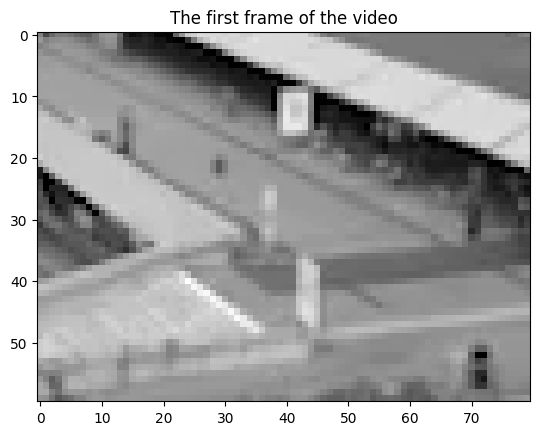

In [ ]:
def video_to_array(video):
    duration = int(video.duration)
    nframes = int(video.fps * video.duration)
    size_h, size_w = video.size
    arr = np.zeros([nframes, size_w, size_h])
    for i in range(nframes):
        arr[i, :, :] = video.get_frame(i/nframes * duration)[:, :, 0].astype(float)
    print('image size: {1:} x {2:}, \nnumber of frames: {0:}'.format(nframes, size_w, size_h))
    return arr

arr = video_to_array(video)
plt.imshow(arr[0, :, :], cmap='gray')
plt.title('The first frame of the video')

#### задача 1 (0.5 балла)

С помощью функции `np.reshape(...)` получите из трехмерного массива `arr` двумерный массив `M` размера `(size_h * size_w) x nframes`, каждым столбцом которого является изображение размера `size_h x size_w`, представленное в виде вектора с `size_h * size_w` элементами

In [ ]:
nframes, size_w, size_h = arr.shape

# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# output: matrix M

Если всё сделано правильно, то вы сможете восстановить первый кадр из первого столбца:

In [ ]:
first_frame = # TO BE FILLED
plt.imshow(first_frame, cmap='gray')
plt.title('The first frame of the video');

#### задача 2 (1.5 балла)

Инстанцируйте класс `R_pca` с параметром $\mu=0.68$. Запустите обучение (метод `.fit()`).

**Обратите внимание**, что на исходных данных метод может работать довольно долго (вероятно, часы). Поэтому предлагается взять только четверть временного ряда, а также вырезать каждый второй кадр.

In [ ]:
# YOUR CODE HERE:
###########################
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
###########################
# 1. Mt == Take 1/4 part of M and only each 2nd frame
# 2. solver = r_pca.R_pca(Mt, mu=0.68)
# 3. X_l, S = solver.fit(max_iter=4000, iter_print=100)

Отрисуйте исходный кадр изображения $M_t$, фона $X_{\ell}$ и движующихся объектов $S$

In [ ]:
_, axs = plt.subplots(1,3, figsize=(15,10))
axs[0].imshow(..., cmap='gray') # TO BE FILLED
axs[0].set_title("Исходное изображение")
axs[1].imshow(..., cmap='gray') # TO BE FILLED
axs[1].set_title("Фон")
axs[2].imshow(..., cmap='gray') # TO BE FILLED
axs[2].set_title("Движущиеся объекты");

Заполните пропуски в функции `M_to_video`, преобразующей матрицу обратно в видео.

In [ ]:
def M_to_video(M, fps, size_w, size_h):
    nframes = M.shape[1]
    arr = # YOUR CODE HERE:
    print(arr.shape)
    def make_frame(t):
        index = int(t * fps)
        frame = arr[index, :, :]
        frame = np.clip(frame, 0, 255)
        frame_rgb = frame[:, :, np.newaxis][:, :, [0,0,0]]
        return frame_rgb
    return mpe.VideoClip(make_frame, duration=nframes / fps)

Посмотрим на видео движущихся объектов


In [ ]:
video_rpca = M_to_video(..., 20, size_w, size_h) # TO BE FILLED
video_rpca.ipython_display(width=300, maxduration=250, fps=20)

### (Доп.) Задание 11 (PTB-XL dimensionality reduction) (2 балла)

Вспомним про набор данных [PTB-XL](https://physionet.org/content/ptb-xl/1.0.3/) из Семинара 5. Там, имея репрезентативные представления модели, полученной в результате инференса электрокардиограмм, мы обучали линейную регрессию на задаче multilabel-классификации.



#### Описание набора данных

Вспомним структуру датасета

1. Скачаем представления и метаданные об ЭКГ

In [4]:
ptbxl_id = '1BggNYgJEU1AlL3eDnCJZUFX5HBnRb9Fg'
download_with_shared_id(ptbxl_id, 'ptbxl_features.zip')

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1BggNYgJEU1AlL3eDnCJZUFX5HBnRb9Fg
From (redirected): https://drive.google.com/uc?export=download&id=1BggNYgJEU1AlL3eDnCJZUFX5HBnRb9Fg&confirm=t&uuid=32a27acf-57b4-4096-954f-60a5e3bee145
To: /content/ptbxl_features.zip
100%|██████████| 49.9M/49.9M [00:01<00:00, 35.0MB/s]


In [5]:
!unzip ptbxl_features.zip

Streaming output truncated to the last 5000 lines.
  inflating: ptbxl_features/16000_16727_hr.npz  
  inflating: ptbxl_features/16000_16076_hr.npz  
  inflating: ptbxl_features/19000_19780_hr.npz  
  inflating: ptbxl_features/04000_04840_hr.npz  
  inflating: ptbxl_features/00000_00626_hr.npz  
  inflating: ptbxl_features/16000_16490_hr.npz  
  inflating: ptbxl_features/19000_19366_hr.npz  
  inflating: ptbxl_features/19000_19437_hr.npz  
  inflating: ptbxl_features/00000_00177_hr.npz  
  inflating: ptbxl_features/06000_06796_hr.npz  
  inflating: ptbxl_features/09000_09060_hr.npz  
  inflating: ptbxl_features/10000_10520_hr.npz  
  inflating: ptbxl_features/10000_10271_hr.npz  
  inflating: ptbxl_features/09000_09731_hr.npz  
  inflating: ptbxl_features/00000_00491_hr.npz  
  inflating: ptbxl_features/16000_16627_hr.npz  
  inflating: ptbxl_features/12000_12841_hr.npz  
  inflating: ptbxl_features/16000_16176_hr.npz  
  inflating: ptbxl_features/19000_19680_hr.npz  
  inflating: ptbxl

In [6]:
df = pd.read_csv('ptbxl_features/map_file.csv')
df.head(5)

,file_name,ecg_shape,frequency,ecg_duration,mkv,patient_id,doctor_id,device_name,report,scp_codes,...,burst_noise,electrodes_problems,pacemaker,strat_fold,extra_beats,heart_axis,infarction_stadium1,infarction_stadium2,age,target
0,00000_00001_hr.npz,"(12, 5000)",500,10,1,15709,NaN,CS-12 E,sinusrhythmus periphere niederspannung,"['NORM', 'LVOLT', 'SR']",...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,56.0,[0]
1,00000_00002_hr.npz,"(12, 5000)",500,10,1,13243,NaN,CS-12 E,sinusbradykardie sonst normales ekg,"['NORM', 'SBRAD']",...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,19.0,[0]
2,00000_00003_hr.npz,"(12, 5000)",500,10,1,20372,NaN,CS-12 E,sinusrhythmus normales ekg,"['NORM', 'SR']",...,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,37.0,[0]
3,00000_00004_hr.npz,"(12, 5000)",500,10,1,17014,NaN,CS-12 E,sinusrhythmus normales ekg,"['NORM', 'SR']",...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,24.0,[0]
4,00000_00005_hr.npz,"(12, 5000)",500,10,1,17448,NaN,CS-12 E,sinusrhythmus normales ekg,"['NORM', 'SR']",...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,19.0,[0]


2. Метаданные представлены следующими полями

In [9]:
df.columns

Index(['file_name', 'ecg_shape', 'frequency', 'ecg_duration', 'mkv',
       'patient_id', 'doctor_id', 'device_name', 'report', 'scp_codes',
       'report_date', 'original_filename', 'nurse', 'site', 'validated_by',
       'second_opinion', 'initial_autogenerated_report', 'validated_by_human',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'pacemaker', 'strat_fold', 'extra_beats', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'age', 'target'],
      dtype='object')

3. Название файла `file_name` указывает на соответствующую ЭКГ, для которой существует репрезентативное представление

In [14]:
features_dir = 'ptbxl_features'
file_name = df.iloc[0]['file_name']
feature_path = os.path.join(features_dir, file_name)
feature = np.load(feature_path)['arr_0']
feature.shape

(512,)

Реальный размер ЭКГ, конечно, гораздо больше, поэтому мы пользуемся заготовленными эмбеддингами

In [19]:
!pip install wfdb
import wfdb

dat_id = '1P90YQqR1oJM3Jy2ILezzfvVHqS2uv3Fe'
hea_id = '1tkZP35O8fV7eX8E2UoPhcXvFaKGM5Imd'
download_with_shared_id(dat_id, '00001_hr.dat')
download_with_shared_id(hea_id, '00001_hr.hea')

record = wfdb.rdrecord('00001_hr')
signal = record.p_signal

Downloading...
From: https://drive.google.com/uc?export=download&id=1P90YQqR1oJM3Jy2ILezzfvVHqS2uv3Fe
To: /content/00001_hr.dat
100%|██████████| 120k/120k [00:00<00:00, 3.81MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1tkZP35O8fV7eX8E2UoPhcXvFaKGM5Imd
To: /content/00001_hr.hea
100%|██████████| 605/605 [00:00<00:00, 1.34MB/s]


In [20]:
signal.shape

(5000, 12)

4. Целевым столбцом является [стандартизированная разметка патологий](https://www.cinc.org/archives/2016/pdf/090-500.pdf).



In [12]:
df['scp_codes'].head(5)

,scp_codes
0,"['NORM', 'LVOLT', 'SR']"
1,"['NORM', 'SBRAD']"
2,"['NORM', 'SR']"
3,"['NORM', 'SR']"
4,"['NORM', 'SR']"


Расшифровку соответствующих кодов можно посмотреть в следующем [файле](https://files.stroyinf.ru/Data2/1/4293740/4293740830.pdf).

Давайте выделим следующие патологии (нарушения работы сердца):
1. AFIB -- Atrial FIBrillation
2. PVC -- Premature Ventricular Contractions
3. CRBBB -- Complete Right Bundle Branch Block
4. CLBBB -- Complete Left Bundle Branch Block
5. 1AVB -- 1st degree AV Block
6. LAFB -- Left Anterior Fascicular Block

И следующие "нормальные" состояния сердца
1. NORM -- нормальное положение оси сердца.
2. SR -- синусовый ритм.

К каждой из кодировок можно получить доступ следующим способом.

(А уже по имени файла -- соответствующее репрезентативное представление)

In [13]:
df[df['scp_codes'].str.contains('LAFB')].head(5)

,file_name,ecg_shape,frequency,ecg_duration,mkv,patient_id,doctor_id,device_name,report,scp_codes,...,burst_noise,electrodes_problems,pacemaker,strat_fold,extra_beats,heart_axis,infarction_stadium1,infarction_stadium2,age,target
66,00000_00103_hr.npz,"(12, 5000)",500,10,1,13722,NaN,CS-12 E,sinustachykardie ueberdrehter linkstyp periphe...,"['IMI', 'LAFB', 'ABQRS', 'STACH']",...,NaN,NaN,NaN,4,NaN,ALAD,Stadium II-III,NaN,39.0,[0]
108,00000_00182_hr.npz,"(12, 5000)",500,10,1,12000,NaN,AT-6 C,sinusrytm extrem vÄnster el-axel ospecifikt sk...,"['ASMI', 'LAFB', '1AVB', 'SR']",...,NaN,NaN,NaN,6,1ES,NaN,Stadium III,NaN,72.0,[0]
129,00000_00220_hr.npz,"(12, 5000)",500,10,1,21580,NaN,CS-12,sinusrhythmus ueberdrehter linkstyp linksanter...,"['LAFB', 'ABQRS', 'SR']",...,NaN,NaN,NaN,5,NaN,ALAD,NaN,NaN,46.0,[0]
134,00000_00226_hr.npz,"(12, 5000)",500,10,1,20431,NaN,CS-12,sinusrhythmus ueberdrehter linkstyp linksanter...,"['LAFB', 'SR']",...,NaN,NaN,NaN,3,NaN,ALAD,NaN,NaN,83.0,[0]
140,00000_00235_hr.npz,"(12, 5000)",500,10,1,15405,NaN,CS-12,sinusbradykardie ...,"['NORM', 'LAFB', 'SBRAD']",...,NaN,NaN,NaN,4,NaN,ALAD,NaN,NaN,79.0,[0]


В отличие от семинара 5, к этому домашнему заданию мы владеем инструментами понижения размерности. Поскольку задание про PCA, давайте использовать только его.

####  Задание

Примените KernelPCA для дальнейшего понижения размерности эмбеддинга. Используйте `n_components=2` для визуальной кластеризации или бОльшее количество для классификации лог. регрессией.

Для того, чтобы классификация/кластеризация была осмысленной, необходимо "поставить" возможные гипотезы.

1. Кластеризация одной из приведённых патологий (AFIB, PVC, CRBBB, CLBBB, ...) против нормального состояния сердца (scp-код `['NORM', 'SR']`).
2. Multilabel-классификация патологий логистической регрессией.
3. Кластеризация людей меньше 20 лет против людей больше 87 лет.

Вы также можете представить свои гипотезы, основываясь на описании мап-файла `df`. За интересные наблюдения будут даваться дополнительные баллы.

Для кластеризации не нужно брать все примеры (так, записей с патологией будет сильно меньше чем "нормальных"). Например, можно взять по 200 примеров для каждого класса.

В случае с multilabel классификацией сравните результаты до и после понижения размерности. Сделайте соответствующие выводы.